In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

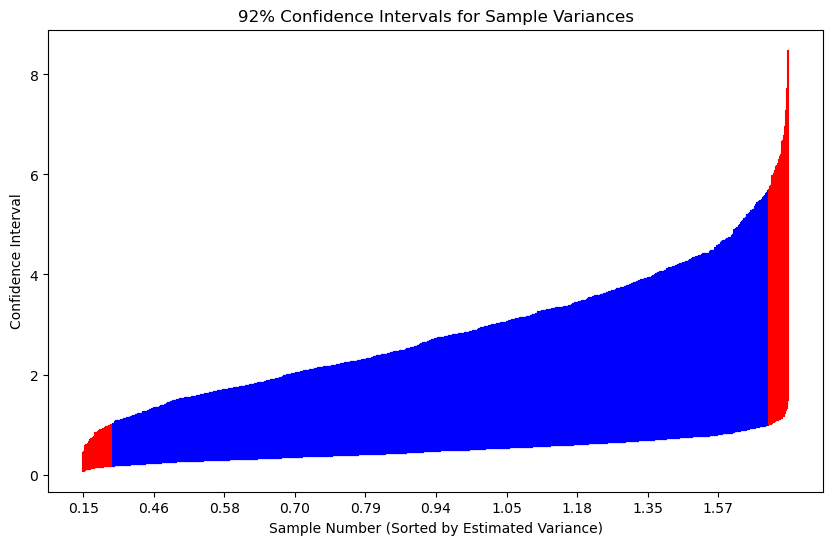

Percentage of intervals containing the true variance: 93.00%


In [68]:
# Parameters
true_variance = 1
sample_size = 10
confidence_level = 0.92
alpha = 1 - confidence_level
num_samples = 1000

# Generate samples and calculate confidence intervals
np.random.seed(0)
samples = np.random.normal(loc=0, scale=np.sqrt(true_variance), size=(num_samples, sample_size))

sample_variances = np.var(samples, axis=1, ddof=1)
chi2_lower = chi2.ppf(alpha / 2, sample_size - 1)
chi2_upper = chi2.ppf(1 - alpha / 2, sample_size - 1)

irm_lower_bounds = (sample_size - 1) * sample_variances / chi2_upper
irm_upper_bounds = (sample_size - 1) * sample_variances / chi2_lower

# Check if true variance is within confidence intervals
contains_true_variance = (ci_lower_bounds <= true_variance) & (ci_upper_bounds >= true_variance)
coverage_percentage = np.mean(contains_true_variance) * 100

# Sort by estimated variance for plotting
sorted_indices = np.argsort(sample_variances)
sorted_variances = sample_variances[sorted_indices]
sorted_ci_lower_bounds = ci_lower_bounds[sorted_indices]
sorted_ci_upper_bounds = ci_upper_bounds[sorted_indices]
sorted_ci_contains_true_variance = contains_true_variance[sorted_indices]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(num_samples):
    color = 'blue' if sorted_ci_contains_true_variance[i] else 'red'
    ax.plot([i, i], [sorted_ci_lower_bounds[i], sorted_ci_upper_bounds[i]], color=color)

# Customize x-axis labels
step = num_samples // 10
ax.set_xticks(range(0, num_samples, step))
ax.set_xticklabels([f'{sorted_variances[i]:.2f}' for i in range(0, num_samples, step)])
ax.set_xlabel('Sample Number (Sorted by Estimated Variance)')
ax.set_ylabel('Confidence Interval')
ax.set_title('92% Confidence Intervals for Sample Variances')
plt.show()

# Report coverage percentage
print(f'Percentage of intervals containing the true variance: {coverage_percentage:.2f}%')


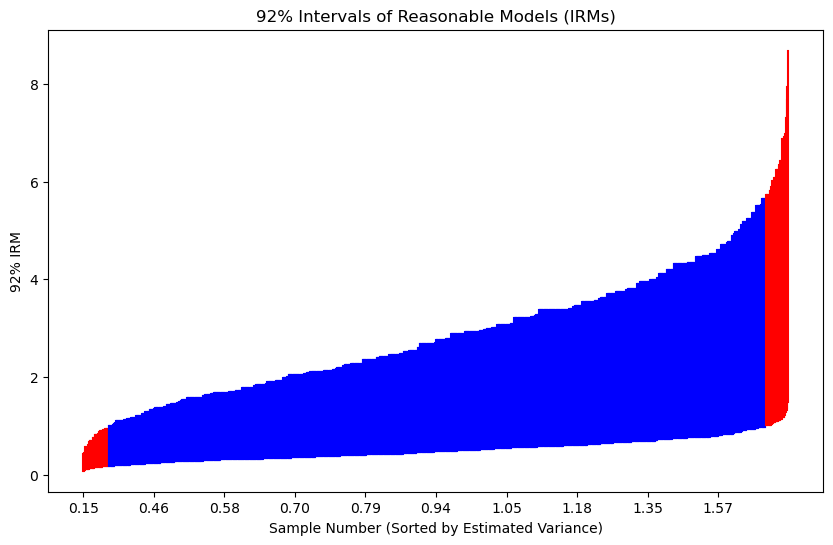

Percentage of intervals containing the true variance: 93.20%


In [69]:
possible_variances = np.linspace(0.01, 10, 1000)

# Compute the 8% tails for each possible variance
tails_lower = []
tails_upper = []

for var in possible_variances:
    simulated_variances = np.var(np.random.normal(loc=0, scale=np.sqrt(var), size=(num_simulations, sample_size)), axis=1, ddof=1)
    tails_lower.append(np.percentile(simulated_variances, alpha/2 * 100))
    tails_upper.append(np.percentile(simulated_variances, (1 - alpha/2) * 100))

tails_lower = np.array(tails_lower)
tails_upper = np.array(tails_upper)

# Determine IRM bounds for each sample variance
irm_lower_bounds = []
irm_upper_bounds = []

for sv in sample_variances:
    valid_variances = possible_variances[(tails_lower < sv) & (tails_upper > sv)]
    if len(valid_variances) > 0:
        lower_bound = np.min(valid_variances)
        upper_bound = np.max(valid_variances)
    else:
        lower_bound = sv
        upper_bound = sv
    irm_lower_bounds.append(lower_bound)
    irm_upper_bounds.append(upper_bound)

irm_lower_bounds = np.array(irm_lower_bounds)
irm_upper_bounds = np.array(irm_upper_bounds)

# Check if true variance is within the IRM bounds
contains_true_variance = (irm_lower_bounds <= true_variance) & (irm_upper_bounds >= true_variance)
coverage_percentage = np.mean(contains_true_variance) * 100

# Sort by estimated variance for plotting
sorted_indices = np.argsort(sample_variances)
sorted_variances = sample_variances[sorted_indices]
sorted_irm_lower_bounds = irm_lower_bounds[sorted_indices]
sorted_irm_upper_bounds = irm_upper_bounds[sorted_indices]
sorted_irm_contains_true_variance = contains_true_variance[sorted_indices]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(num_samples):
    color = 'blue' if sorted_irm_contains_true_variance[i] else 'red'
    ax.plot([i, i], [sorted_irm_lower_bounds[i], sorted_irm_upper_bounds[i]], color=color)

# Customize x-axis labels
step = num_samples // 10
ax.set_xticks(range(0, num_samples, step))
ax.set_xticklabels([f'{sorted_variances[i]:.2f}' for i in range(0, num_samples, step)])
ax.set_xlabel('Sample Number (Sorted by Estimated Variance)')
ax.set_ylabel('92% IRM')
ax.set_title('92% Intervals of Reasonable Models (IRMs)')
plt.show()

# Report coverage percentage
print(f'Percentage of intervals containing the true variance: {coverage_percentage:.2f}%')


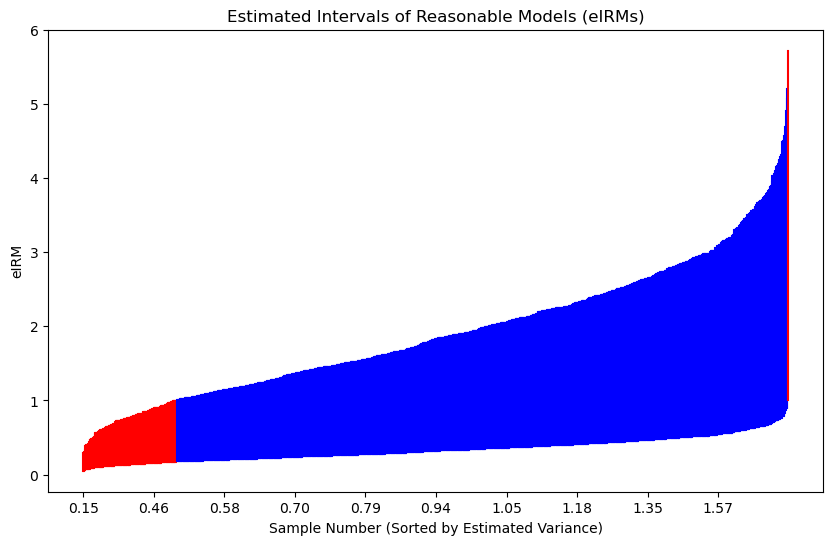

Percentage of intervals containing the true variance: 86.60%


In [70]:
# Calculate eIRM bounds for each sample variance
eirm_lower_bounds = chi2.ppf(alpha / 2, sample_size - 1) * sample_variances / (sample_size - 1)
eirm_upper_bounds = chi2.ppf(1 - (alpha / 2), sample_size - 1) * sample_variances / (sample_size - 1)

# Check if true variance is within the eIRM bounds
contains_true_variance = (eirm_lower_bounds <= true_variance) & (eirm_upper_bounds >= true_variance)
coverage_percentage = np.mean(contains_true_variance) * 100

# Sort by estimated variance for plotting
sorted_indices = np.argsort(sample_variances)
sorted_variances = sample_variances[sorted_indices]
sorted_eirm_lower_bounds = eirm_lower_bounds[sorted_indices]
sorted_eirm_upper_bounds = eirm_upper_bounds[sorted_indices]
sorted_eirm_contains_true_variance = contains_true_variance[sorted_indices]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(num_samples):
    color = 'blue' if sorted_eirm_contains_true_variance[i] else 'red'
    ax.plot([i, i], [sorted_eirm_lower_bounds[i], sorted_eirm_upper_bounds[i]], color=color)

# Customize x-axis labels
step = num_samples // 10
ax.set_xticks(range(0, num_samples, step))
ax.set_xticklabels([f'{sorted_variances[i]:.2f}' for i in range(0, num_samples, step)])
ax.set_xlabel('Sample Number (Sorted by Estimated Variance)')
ax.set_ylabel('eIRM')
ax.set_title('Estimated Intervals of Reasonable Models (eIRMs)')
plt.show()

# Report coverage percentage
print(f'Percentage of intervals containing the true variance: {coverage_percentage:.2f}%')


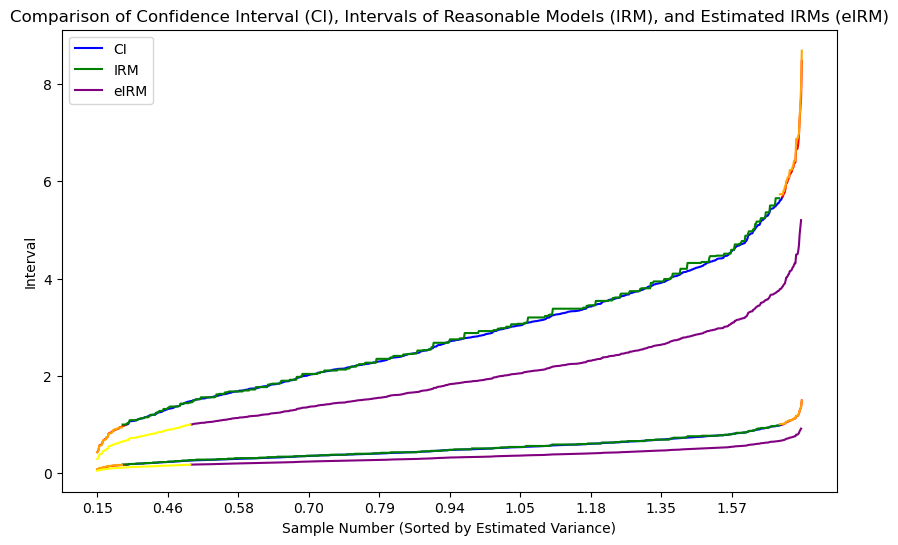

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot CI
x = np.arange(num_samples)
contains_lower = np.where(sorted_ci_contains_true_variance, sorted_ci_lower_bounds, np.nan)
not_contains_lower = np.where(sorted_ci_contains_true_variance, np.nan, sorted_ci_lower_bounds)
contains_upper = np.where(sorted_ci_contains_true_variance, sorted_ci_upper_bounds, np.nan)
not_contains_upper = np.where(sorted_ci_contains_true_variance, np.nan, sorted_ci_upper_bounds)

ax.plot(x, contains_lower, 'blue', label='CI')
ax.plot(x, contains_upper, 'blue')
ax.plot(x, not_contains_lower, 'red')
ax.plot(x, not_contains_upper, 'red')

# # Plot IRM
contains_lower = np.where(sorted_irm_contains_true_variance, sorted_irm_lower_bounds, np.nan)
not_contains_lower = np.where(sorted_irm_contains_true_variance, np.nan, sorted_irm_lower_bounds)
contains_upper = np.where(sorted_irm_contains_true_variance, sorted_irm_upper_bounds, np.nan)
not_contains_upper = np.where(sorted_irm_contains_true_variance, np.nan, sorted_irm_upper_bounds)

ax.plot(x, contains_lower, 'green', label='IRM')
ax.plot(x, contains_upper, 'green')
ax.plot(x, not_contains_lower, 'orange')
ax.plot(x, not_contains_upper, 'orange')

# # Plot eIRM
contains_lower = np.where(sorted_eirm_contains_true_variance, sorted_eirm_lower_bounds, np.nan)
not_contains_lower = np.where(sorted_eirm_contains_true_variance, np.nan, sorted_eirm_lower_bounds)
contains_upper = np.where(sorted_eirm_contains_true_variance, sorted_eirm_upper_bounds, np.nan)
not_contains_upper = np.where(sorted_eirm_contains_true_variance, np.nan, sorted_eirm_upper_bounds)

ax.plot(x, contains_lower, 'purple', label='eIRM')
ax.plot(x, contains_upper, 'purple')
ax.plot(x, not_contains_lower, 'yellow')
ax.plot(x, not_contains_upper, 'yellow')

# Customize x-axis labels
step = num_samples // 10
ax.set_xticks(range(0, num_samples, step))
ax.set_xticklabels([f'{sorted_variances[i]:.2f}' for i in range(0, num_samples, step)])
ax.set_xlabel('Sample Number (Sorted by Estimated Variance)')
ax.set_ylabel('Interval')
ax.set_title('Comparison of Confidence Interval (CI), Intervals of Reasonable Models (IRM), and Estimated IRMs (eIRM)')
ax.legend()